## Конфиги, чтоб график отрисовывался

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense

# Обучающая выборка

## Делаем нейронную сеть на температуру Форенгейта

### Должна получится формула F = C * 1,8 + 30 

#### Нейронка должна получить 1,8 и 30

In [3]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])   # Цельсий
f = np.array([-40, 14, 32, 46, 59, 72, 100]) # Форенгейт

In [4]:
model = keras.Sequential() # Создание модели

In [5]:
model.add(Dense(units=1, input_shape=(1,), activation='linear')) # Коркас модели

```units```        - Кол-во нейронов <br>
```input_shape```  - Кол-во входных данных в 1 нейрон <br>
```activation```   - Функция активации

In [6]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1)) # Компиляция (готовность к обучению)

```loss```      - Критерий качества <br>
```optimizer``` - Оптимизатор градиентного спуска <br>
>```keras.optimizers.Adam(0.1)``` - шаг сходимости градиентного спуска или learning_rate

In [7]:
history = model.fit(c, f, epochs=500, verbose=False)

```c``` - Входные значения
```f``` - Выводимые (которые будем ожидать) <br>
```epochs``` - Сколько раз итерируем
<blockquote> 
    В нашем случае 500раз итерируем <code>[-40, -10, 0, 8, 15, 22, 38]</code> <br>
    И на каждей итерации получаем 'mean_squared_error' и используем оптимизатор <br>
    Тем самым оптимизируя модель <br>
</blockquote>
<code>verbose</code> - Показывает служебную инфу

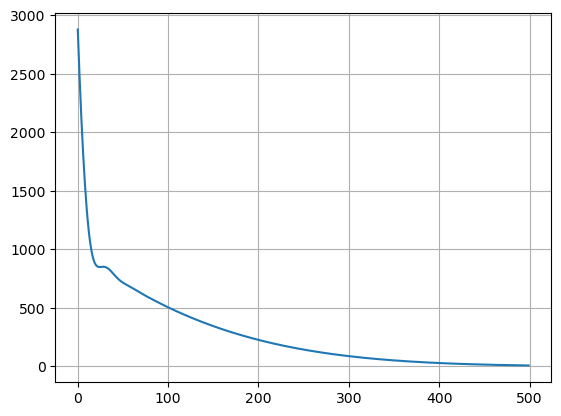

In [8]:
plt.plot(history.history['loss']) # Что рисовать
plt.grid(True) # добавление на фоне квадратов
plt.show() # Показать

In [9]:
print(model.predict([100])) # используем в пылевых условиях

1/1 [==============================] - 0s 89ms/step
[[211.32356]]


In [10]:
print("1.8:", model.get_weights()[0]) 

1.8: [[1.8225694]]


In [11]:
print("30:", model.get_weights()[1])

30: [29.066616]


# Функции активации

### Распознование:
1. Hindge
2. Бинарная кросс-энтропия (binary crossentropy) - при квалификации 2-х классов
3. Категориальная кросс-энтропия (categorical crossentropy) - при квалификации > 2 классов
### Обраб. текста:
1. logcosh
### Регрессия:
1. средний квадрат ошибок (mean squared error)
2. средний модуль ошибок (mean absolute error)
3. средний абсолютный процент ошибок (mean absolute percentage error) - харош в прогнозировании
4. средний квадрат логарифмических ошибок (mean squared logarithmic error)

#### Инфа:
#### https://youtu.be/jy6Dz4I5WHc?t=702